In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene
from scipy.stats import mannwhitneyu

# Load the dataset
df = pd.read_excel("Sales2024.xlsx", parse_dates=["Date"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   object        
 1   Date              1000 non-null   datetime64[ns]
 2   Product           1000 non-null   object        
 3   Category          1000 non-null   object        
 4   Quantity Sold     1000 non-null   int64         
 5   Unit Price        1000 non-null   float64       
 6   Total Sales       1000 non-null   float64       
 7   Customer ID       1000 non-null   object        
 8   Customer Age      1000 non-null   int64         
 9   Customer Sex      1000 non-null   object        
 10  Customer Type     1000 non-null   object        
 11  Payment Method    1000 non-null   object        
 12  Region            1000 non-null   object        
 13  Store Location    1000 non-null   object        
 14  Customer Segment  1000 no

In [ ]:
# Quick look at the data
df.info()
print(df.head())

In [2]:
# Round Total Sales column
df["Total Sales"]=round(df["Total Sales"], 2)

# Create Month columns
df["Month"] = df["Date"].dt.month_name()
df["Month number"] = df["Date"].dt.month

print(df.head())

  Transaction ID       Date     Product     Category  Quantity Sold  \
0        TXN1000 2024-12-20       Boots     Footwear              4   
1        TXN1001 2024-09-29  Foundation    Cosmetics              9   
2        TXN1002 2024-03-23         Hat  Accessories              4   
3        TXN1003 2024-04-19    Lipstick    Cosmetics             10   
4        TXN1004 2024-07-08     Sandals     Footwear              3   

   Unit Price  Total Sales Customer ID  Customer Age Customer Sex  \
0      214.00       856.00   CUST10037            43       Female   
1       97.20       874.80   CUST10169            35       Female   
2      126.99       507.96   CUST10271            45       Female   
3       16.40       164.00   CUST10065            24       Female   
4       42.26       126.78   CUST10227            28         Male   

  Customer Type Payment Method Region Store Location Customer Segment  \
0           New     Debit Card   West         Berlin          Group A   
1     Return

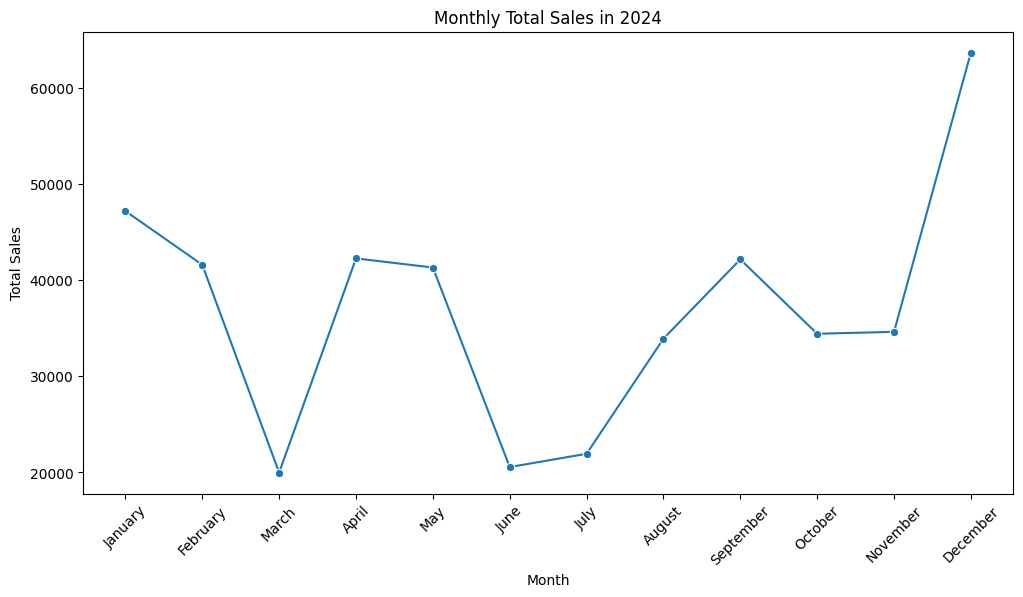

In [3]:
# Visualization of the monthly total sales to see overall trends throughout 2024
monthly_sales = df.groupby(["Month", "Month number"])["Total Sales"].sum().reset_index()
monthly_sales=monthly_sales.sort_values(by="Month number")

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month", y="Total Sales", marker="o")
plt.title("Monthly Total Sales in 2024")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Highest sales during December (likely due to holidays), lowest in March, June and July (possibly marketing campaigns failed)

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_13508\3278602078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Category", y="Total Sales", palette="viridis")


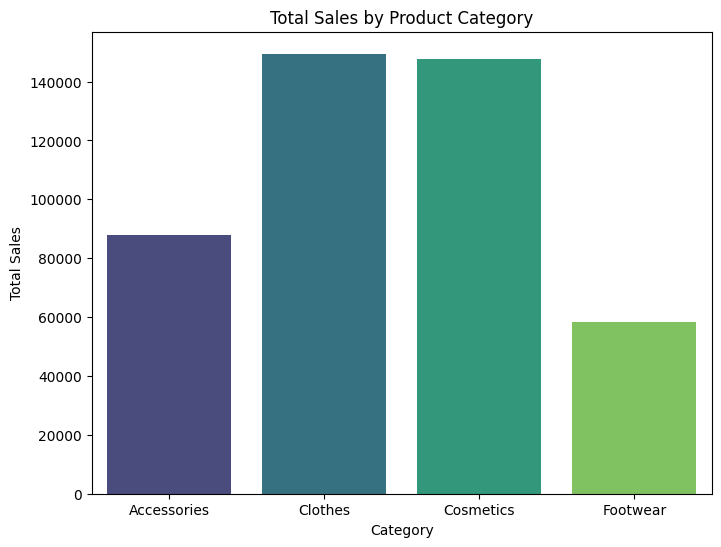

In [4]:
# Barplot to compare total sales across different product categories
category_sales = df.groupby("Category")["Total Sales"].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=category_sales, x="Category", y="Total Sales", palette="viridis")
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

# Clothes and Cosmetics made the highest total sales, while Footwear the lowest

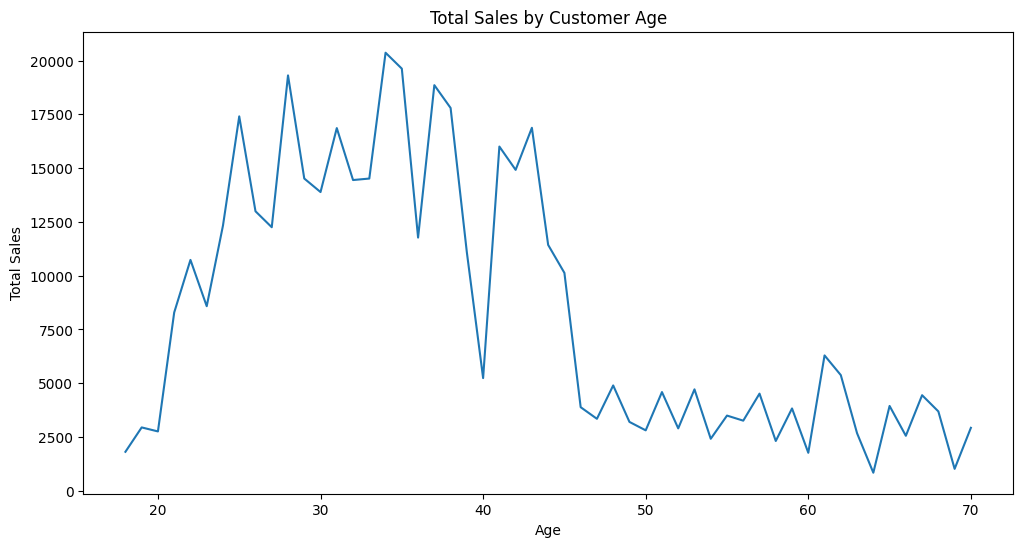

In [5]:
# Check the distribution of customer ages
age_sales = df.groupby("Customer Age")["Total Sales"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_sales, x="Customer Age", y="Total Sales")
plt.title("Total Sales by Customer Age")
plt.xlabel("Age")
plt.ylabel("Total Sales")
plt.show()

# Age of the core demographic is around 25-45

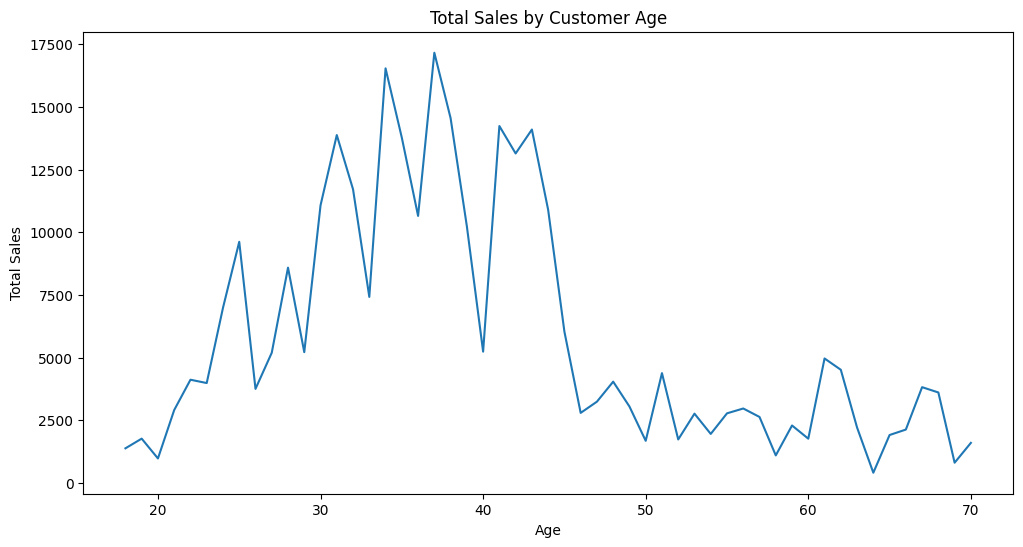

In [6]:
# Check the distribution of female customer ages
fem_age_sales = df[df["Customer Sex"]=="Female"].groupby("Customer Age")["Total Sales"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=fem_age_sales, x="Customer Age", y="Total Sales")
plt.title("Total Sales by Customer Age")
plt.xlabel("Age")
plt.ylabel("Total Sales")
plt.show()

# Matches overall trend

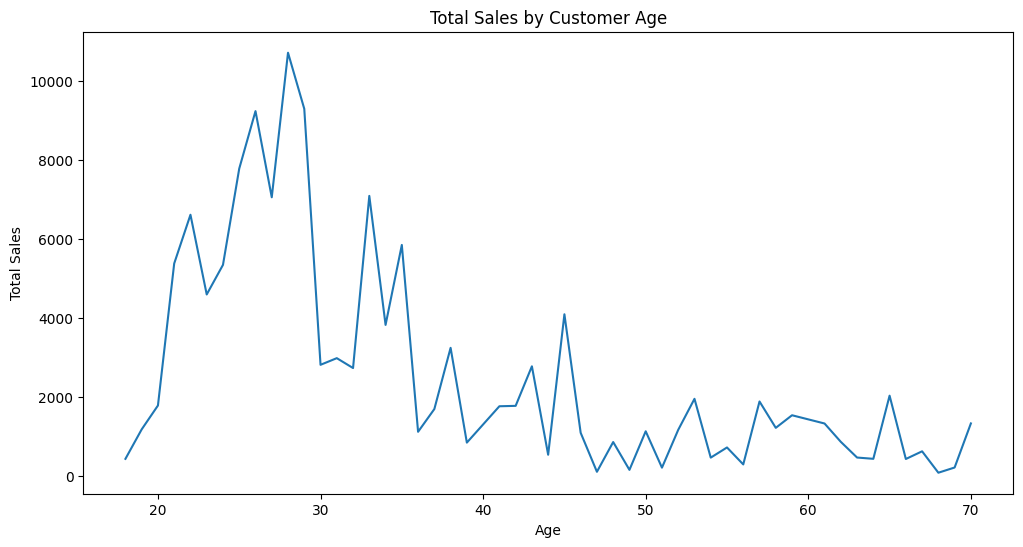

In [7]:
# Check the distribution of male customer ages
men_age_sales = df[df["Customer Sex"]=="Male"].groupby("Customer Age")["Total Sales"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=men_age_sales, x="Customer Age", y="Total Sales")
plt.title("Total Sales by Customer Age")
plt.xlabel("Age")
plt.ylabel("Total Sales")
plt.show()

# Male customers a little younger

In [8]:
# Segment customers into 3 age groups: less than 30, 30-45, more than 45
def conditions(df): 
    if df["Customer Age"]<=30:
        return "Age 18-30"
    elif df["Customer Age"] in range(30, 46):
        return "Age 31-45"
    else:
        return "Age 46-70"
df["Age Group"] = df.apply(conditions, axis=1)

print(df.head())

  Transaction ID       Date     Product     Category  Quantity Sold  \
0        TXN1000 2024-12-20       Boots     Footwear              4   
1        TXN1001 2024-09-29  Foundation    Cosmetics              9   
2        TXN1002 2024-03-23         Hat  Accessories              4   
3        TXN1003 2024-04-19    Lipstick    Cosmetics             10   
4        TXN1004 2024-07-08     Sandals     Footwear              3   

   Unit Price  Total Sales Customer ID  Customer Age Customer Sex  \
0      214.00       856.00   CUST10037            43       Female   
1       97.20       874.80   CUST10169            35       Female   
2      126.99       507.96   CUST10271            45       Female   
3       16.40       164.00   CUST10065            24       Female   
4       42.26       126.78   CUST10227            28         Male   

  Customer Type Payment Method Region Store Location Customer Segment  \
0           New     Debit Card   West         Berlin          Group A   
1     Return

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_13508\257009002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_avgsales, x="Customer Type", y="Total Sales", palette="viridis")


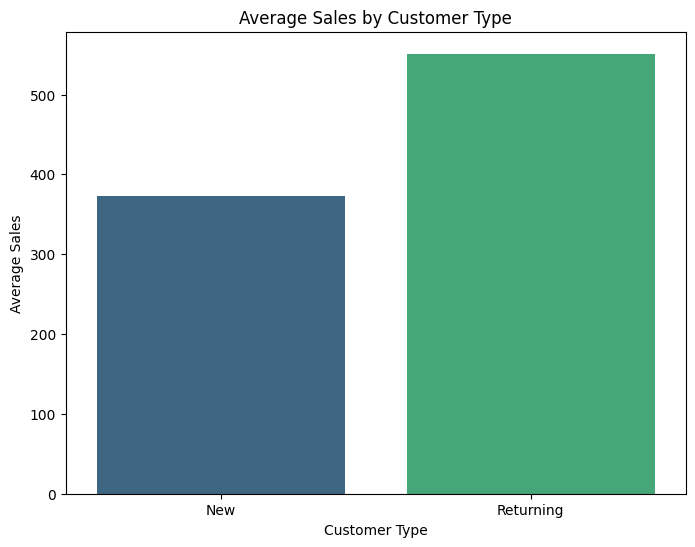

In [9]:
# Check Average Sales of New and Returning Customers
customer_avgsales = df.groupby("Customer Type")["Total Sales"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=customer_avgsales, x="Customer Type", y="Total Sales", palette="viridis")
plt.title("Average Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Sales")
plt.show()

In [10]:
# T-Test: Comparing average sales per-customer between Customer types to determine if there is a significant difference in spending between New and 
# Returning Customers
# Null Hypothesis (H₀): There is no difference in average spending between New and Returning customers.
# Alternative Hypothesis (H₁): There is a difference in average spending between New and Returning customers.

# Separate the total sales for each type of customer
df_unique = df.groupby(["Customer Type", "Customer ID"])["Total Sales"].sum().reset_index()
new_sales_unique = df_unique[df_unique["Customer Type"] == "New"]["Total Sales"]
returning_sales_unique = df_unique[df_unique["Customer Type"] == "Returning"]["Total Sales"]

In [11]:
# Check normality for New Customers
shapiro_new = stats.shapiro(new_sales_unique)
print("Shapiro-Wilk Test for New Customers:")
print(f"Test Statistic: {shapiro_new.statistic:.4f}, P-value: {shapiro_new.pvalue:.4f}")

# Check normality for Returning Customers
shapiro_returning = stats.shapiro(returning_sales_unique)
print("\nShapiro-Wilk Test for Returning Customers:")
print(f"Test Statistic: {shapiro_returning.statistic:.4f}, P-value: {shapiro_returning.pvalue:.4f}")
# Non-normality for both

Shapiro-Wilk Test for New Customers:
Test Statistic: 0.8585, P-value: 0.0000

Shapiro-Wilk Test for Returning Customers:
Test Statistic: 0.8409, P-value: 0.0000


In [12]:
# Checking sample sizes
print("New Customers sample size:", len(new_sales_unique))
print("Returning Customers sample size:", len(returning_sales_unique))
# Sample is large, so can follow Central Limit Theorem that states the distribution of sample means approaches a normal distribution as the sample size 
# increases, regardless of the original data distribution.

New Customers sample size: 294
Returning Customers sample size: 232


In [13]:
# Since data is non-normal, use Levene’s test to check if the variances of sales between New and Returning customers are equal. 
levene_stat, levene_p = levene(new_sales_unique, returning_sales_unique, center='median')

print("Levene’s Test for Homogeneity of Variance:")
print(f"Test Statistic: {levene_stat:.3f}, P-value: {levene_p:.3f}")

# Interpret the result
if levene_p > 0.05:
    print("Variances are EQUAL (use equal_var=True in t-test)")
else:
    print("Variances are UNEQUAL (use equal_var=False in t-test)")

Levene’s Test for Homogeneity of Variance:
Test Statistic: 8.800, P-value: 0.003
Variances are UNEQUAL (use equal_var=False in t-test)


In [14]:
# Perform an independent t-test (Welch's t-test to account for unequal variances)
t_stat, p_value = stats.ttest_ind(new_sales_unique, returning_sales_unique, equal_var=False)
print("T-test for Total Sales by Customer Type:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# A p-value less than 0.05 suggests a statistically significant difference in average spending between customer types, the null hypothesis is rejected.
# New customers have lower average spending than Returning customers.
# The business should prioritize retaining returning customers while improving new customer conversion (loyalty programs for returning customers, 
# incentives for new customers like discounts)

T-test for Total Sales by Customer Type:
T-statistic: -2.6452287218318946
P-value: 0.008468974140645248


In [15]:
# A/B Test
# Goal: Increase new customers' Average Order Value (AOV) by offering conditional discounts ("Spend $400+, get 20% off").
# Experimental design: A 2-week experiment with random segmentation into 2 groups. Group A (len 35) was not offered a discount, Group B (len 35) was 
# offered a conditional discount.
# Null Hypothesis (H₀): There is no difference in average spending between Group A and Group B.
# Alternative Hypothesis (H₁): There is a difference in average spending between Group A and Group B.

# Load and look at the data
newcust = pd.read_excel("NewCustomers2024.xlsx")
newcust.info()
print(newcust.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    70 non-null     object        
 1   Date              70 non-null     datetime64[ns]
 2   Product           70 non-null     object        
 3   Category          70 non-null     object        
 4   Quantity Sold     70 non-null     int64         
 5   Unit Price        70 non-null     float64       
 6   Total Sales       70 non-null     float64       
 7   TS Discounted     35 non-null     float64       
 8   Customer ID       70 non-null     object        
 9   Customer Age      70 non-null     int64         
 10  Customer Sex      70 non-null     object        
 11  Customer Type     70 non-null     object        
 12  Payment Method    70 non-null     object        
 13  Region            70 non-null     object        
 14  Store Location    70 non-nul

In [16]:
# Control group was not offered a discount
control_group = newcust[newcust["Customer Segment"] == "Group A"]
# Test group was offered a discount
test_group = newcust[newcust["Customer Segment"] == "Group B"]

In [17]:
# Checking Average Order Value (AOV)
aov_control = control_group["Total Sales"].mean()
aov_test = test_group["TS Discounted"].mean()

print(f"Control AOV: ${aov_control:.2f}")
print(f"Discount Group AOV: ${aov_test:.2f}")

Control AOV: $266.53
Discount Group AOV: $459.17


In [18]:
# Check for normality before a t-test
shapiro_c = stats.shapiro(control_group["Total Sales"])
print("Shapiro-Wilk Test for Control Group:")
print(f"Test Statistic: {shapiro_c.statistic:.4f}, P-value: {shapiro_c.pvalue:.4f}")

shapiro_t = stats.shapiro(test_group["TS Discounted"])
print("Shapiro-Wilk Test for Test Group:")
print(f"Test Statistic: {shapiro_t.statistic:.4f}, P-value: {shapiro_t.pvalue:.4f}")

# Control group is non-normal, use Mann-Whitney U test

Shapiro-Wilk Test for Control Group:
Test Statistic: 0.9265, P-value: 0.0220
Shapiro-Wilk Test for Test Group:
Test Statistic: 0.9668, P-value: 0.3619


In [19]:
# Perform Mann-Whitney U test

u_stat, p_value = mannwhitneyu(
    control_group["Total Sales"], 
    test_group["TS Discounted"],
    alternative='two-sided' 
)

print(f"Mann-Whitney U Test Results:")
print(f"U-statistic: {u_stat:.0f}")
print(f"P-value: {p_value:.4f}")

# Significant difference in spending between groups (p-value < 0.05), conditional discount helped increase AOV of New customers, so we can offer it for
# all New customers

Mann-Whitney U Test Results:
U-statistic: 292
P-value: 0.0002


In [20]:
# Chi-Square Test: test whether there is an association between the type of customer (New vs. Returning) and their preferred payment method (Credit card,
# Debit card, Cash, PayPal)
# Null Hypothesis (H₀): There is no association between customer type and payment method.
# Alternative Hypothesis (H₁): There is an association between customer type and payment method.

contingency_table = pd.crosstab(df["Customer Type"], df["Payment Method"])
print(contingency_table)

Payment Method  Cash  Credit Card  Debit Card  PayPal
Customer Type                                        
New              138          181         153     130
Returning        104          107         155      32


In [21]:
# Chi-Square Test
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Test between Customer Type and Payment Method:")
print("Chi-square statistic:", chi2)
print("P-value:", p_val)

# P-value less than 0.05 suggests a statistically significant association between customer type and payment method, so reject the null hypothesis.

Chi-Square Test between Customer Type and Payment Method:
Chi-square statistic: 43.27251500785915
P-value: 2.154013117231383e-09


In [22]:
# To identify where the specific differences occur, analyze the standardized residuals (z-scores) or observed vs. expected frequencies.
residuals = (contingency_table - expected) / np.sqrt(expected)
print("Standardized Residuals (z-scores):\n", residuals)

Standardized Residuals (z-scores):
 Payment Method      Cash  Credit Card  Debit Card    PayPal
Customer Type                                              
New            -0.636622     0.579013   -2.380597  3.288568
Returning       0.782957    -0.712107    2.927808 -4.044487


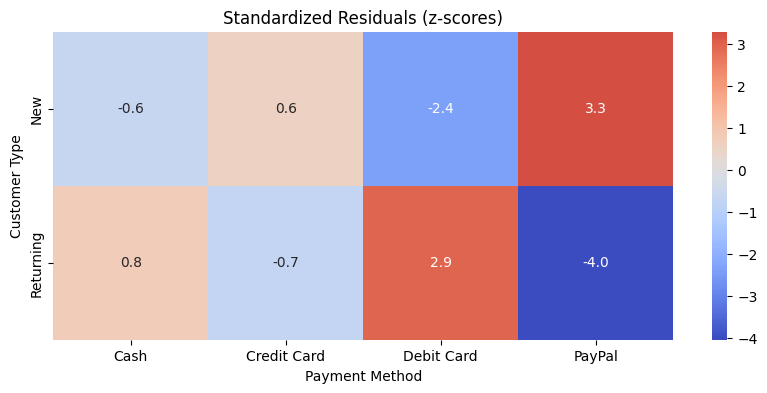

In [23]:
# Plot observed vs. expected frequencies
plt.figure(figsize=(10, 4))
sns.heatmap(residuals, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Standardized Residuals (z-scores)")
plt.show()

# Coefficients higher than 2 suggests significance
# New customers prefer PayPal significantly and avoid Debit card payment significantly
# Returning customers significantly prefer Debit cards and significantly avoid PayPal method
# Possible strategies: promoting PayPal fast checkout for new customers, offering first-time PayPal discounts, encouraging returning customers to save a 
# debit card as their default payment method